In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import interp1d
from scipy.spatial import ConvexHull
from scipy.signal import savgol_filter
import plotly.express as px
import sys

sys.path.append("../components/paddock/")

%load_ext autoreload
%autoreload 2
from telemetry.influx import Influx

from IPython.display import Image

import plotly.express as px
import plotly.graph_objects as go

pd.set_option("display.max_columns", None)

In [3]:
influx = Influx()
influx.laps_from_file("tracks.csv")
# data = influx.telemetry_for(game = "Automobilista 2", track = "Nurburgring_2020:Nurb_GP_2020_Veedol")
# data = influx.telemetry_for(game = "Automobilista 2", track = "SpaFrancorchamps:Spa_Francorchamps_1970")
data = influx.telemetry_for(
    game="Automobilista 2", track="Laguna_Seca:Laguna_Seca_2020"
)
# data = influx.telemetry_for(game = "Automobilista 2", track = "Fontana:Fontana_OVAL")

Processing Automobilista 2 Laguna_Seca:Laguna_Seca_2020 1670176288 5
Processing Automobilista 2 Laguna_Seca:Laguna_Seca_2020 1670176288 4
Processing Automobilista 2 Laguna_Seca:Laguna_Seca_2020 1670176288 1
Processing Automobilista 2 Laguna_Seca:Laguna_Seca_2020 1670176288 3
Processing Automobilista 2 Laguna_Seca:Laguna_Seca_2020 1670176288 2
Processing Automobilista 2 Laguna_Seca:Laguna_Seca_2020 1670260618 11
Processing Automobilista 2 Laguna_Seca:Laguna_Seca_2020 1670260618 4
Processing Automobilista 2 Laguna_Seca:Laguna_Seca_2020 1670260618 3
Processing Automobilista 2 Laguna_Seca:Laguna_Seca_2020 1670260618 13
Processing Automobilista 2 Laguna_Seca:Laguna_Seca_2020 1670260618 5
Processing Automobilista 2 Laguna_Seca:Laguna_Seca_2020 1670260618 2
Processing Automobilista 2 Laguna_Seca:Laguna_Seca_2020 1670260618 6
Processing Automobilista 2 Laguna_Seca:Laguna_Seca_2020 1670260618 8
Processing Automobilista 2 Laguna_Seca:Laguna_Seca_2020 1670260618 12
Processing Automobilista 2 Lagu

In [66]:
f = go.FigureWidget()
display(f)

for idx, df in enumerate(data):
    # df.plot.scatter(x="x", y="y", s=0.1)
    # plt.show()
    f.add_scatter(
        x=df["x"], y=df["y"], name=str(idx), mode="markers", marker=dict(size=2)
    )

FigureWidget({
    'data': [], 'layout': {'template': '...'}
})

In [61]:
# merge all dataframes into one
df = pd.concat(data)
# create a new field as the combination of CurrentLap and Session
df["slap"] = df["SessionId"].astype(str) + "-" + df["CurrentLap"].astype(str)

# create a scatter plot using plotly express
fig = px.scatter(df, x="x", y="y", color="slap", hover_data=["slap"])
fig.show()

In [64]:
# create a line plot using plotly express with DistanceRoundTrack as x and Brake as y
fig = px.line(df, x="DistanceRoundTrack", y="Brake", color="slap", hover_data=["slap"])
fig.show()

Test score: 0.03


/Users/mhild/.local/share/virtualenvs/notebooks-rqKsxfio/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



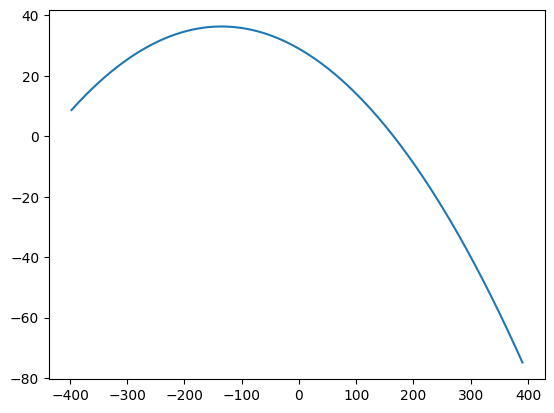

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

df = data[0]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(df[["x"]], df["y"], test_size=0.2)

# Transform the data using PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a linear model to the transformed data
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluate the model on the test set
test_score = model.score(X_test_poly, y_test)
print(f"Test score: {test_score:.2f}")

import matplotlib.pyplot as plt

# Generate a range of x values to use for prediction
x_range = np.arange(df["x"].min(), df["x"].max(), 0.1)

# Transform the x values using PolynomialFeatures
x_range_poly = poly.transform(x_range.reshape(-1, 1))

# Predict the y values using the model
y_pred = model.predict(x_range_poly)

# Plot the data points and the curve
# plt.scatter(df['x'], df['y'])
plt.plot(x_range, y_pred)
plt.show()

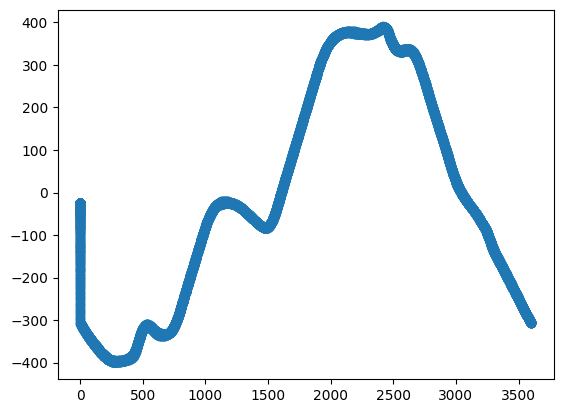

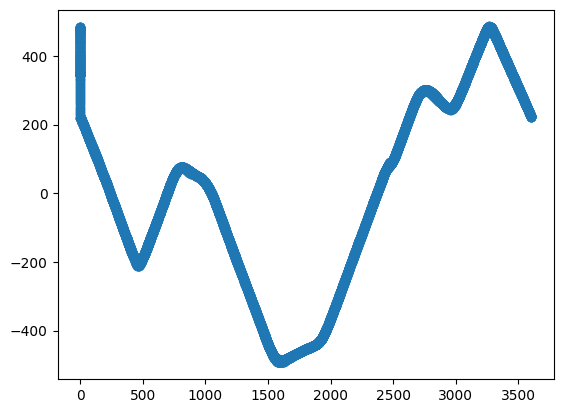

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# merge the dataframes
df = pd.concat(data)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(
    df[["DistanceRoundTrack"]], df[["x", "y"]], test_size=0.2
)
poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


plt.scatter(df["DistanceRoundTrack"], df["x"])
plt.show()

plt.scatter(df["DistanceRoundTrack"], df["y"])
plt.show()

# # Fit a linear model to the transformed data
# model = LinearRegression()
# model.fit(X_train_poly, y_train)

# # Evaluate the model on the test set
# test_score = model.score(X_test_poly, y_test)
# print(f'Test score: {test_score:.2f}')

# import matplotlib.pyplot as plt

# # Generate a range of distance values to use for prediction
# distance_range = np.arange(df['DistanceRoundTrack'].min(), df['DistanceRoundTrack'].max(), 0.1)

# # Transform the distance values using PolynomialFeatures
# distance_range_poly = poly.transform(distance_range.reshape(-1, 1))

# # Predict the x and y values using the model
# xy_pred = model.predict(distance_range_poly)

# # Plot the data points and the curve
# # plt.scatter(df['distance'], df[['x', 'y']])
# # plt.plot(distance_range, xy_pred)
# plt.scatter(xy_pred[:,1], xy_pred[:,0], s=0.1)
# plt.show()

In [7]:
f = go.FigureWidget()
# display(f)

f.add_scatter(x=df["x"], y=df["y"], name="data", mode="markers", marker=dict(size=2))

FigureWidget({
    'data': [{'marker': {'size': 2},
              'mode': 'markers',
              'name': 'da…

/Users/mhild/.local/share/virtualenvs/notebooks-rqKsxfio/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



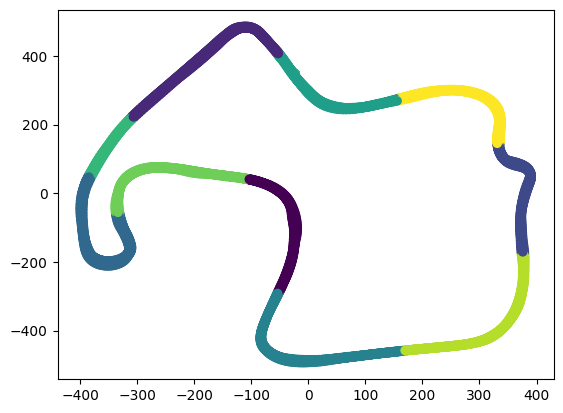

In [43]:
from sklearn.cluster import KMeans

# Extract the x and y coordinates of the track
X = df[["x", "y", "Brake", "Throttle", "Gear", "SpeedMs", "DistanceRoundTrack"]]
# display(X)

# Fit a k-means model to the data
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

# Predict the cluster labels for each data point
labels = kmeans.predict(X)

# Plot the data points with different colors for each cluster
plt.scatter(df["x"], df["y"], c=labels, cmap="viridis")
plt.show()

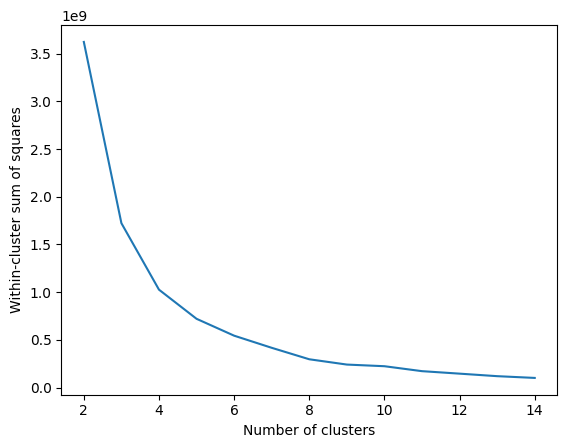

In [45]:
from sklearn.cluster import KMeans

# Extract the x and y coordinates of the track
X = df[["x", "y", "Brake", "Throttle", "Gear", "SpeedMs", "DistanceRoundTrack"]]

# Initialize an empty list to store the within-cluster sum of squares
sums_of_squares = []

# Fit a k-means model to the data for different values of n_clusters
for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=n_clusters, n_init="auto")
    kmeans.fit(X)
    sums_of_squares.append(kmeans.inertia_)

# Plot the within-cluster sum of squares
plt.plot(range(2, 15), sums_of_squares)
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster sum of squares")
plt.show()

The "elbow" in an elbow plot corresponds to the point at which the rate of decrease in the within-cluster sum of squares begins to level off. To determine this point, you can visually inspect the plot and look for the point at which the curve starts to flatten out or "bend."

Alternatively, you can use a more quantitative approach to identify the elbow point. One method is to fit a curve to the data points and use the derivative of the curve to identify the point at which the rate of change starts to decrease.

Here is an example of how you can use the curve_fit function from scipy to fit a curve to the data points in an elbow plot and use the derivative of the curve to identify the elbow point:

In [53]:
from scipy.optimize import curve_fit


def fit_polynomial(x, y):
    def polynomial(x, *coefficients):
        return sum(coeff * x**i for i, coeff in enumerate(coefficients))

    # Fit a polynomial to the data points
    coefficients, _ = curve_fit(polynomial, x, y)

    return coefficients


# Extract the x and y coordinates of the track
X = df[["x", "y", "Brake", "Throttle", "Gear", "SpeedMs", "DistanceRoundTrack"]]

# Initialize an empty list to store the within-cluster sum of squares
sums_of_squares = []

# Fit a k-means model to the data for different values of n_clusters
for n_clusters in range(5, 15):
    kmeans = KMeans(n_clusters=n_clusters, n_init="auto")
    kmeans.fit(X)
    sums_of_squares.append(kmeans.inertia_)

# Fit a curve to the data points
x = range(5, 15)
y = sums_of_squares
coefficients = fit_polynomial(x, y)

# # Compute the derivative of the curve
# derivative = np.polyder(coefficients)

# # Find the roots of the derivative
# roots = np.roots(derivative)

# # Find the elbow point by selecting the root that is closest to the data points
# elbow_point = int(round(roots[np.argmin(np.abs(roots - x))]))

# print('Elbow point:', elbow_point)

# Plot the data points and the fitted curve
plt.plot(x, y, "o")
plt.plot(x, np.polyval(coefficients, x))
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster sum of squares")
plt.show()

range(5, 15)

[720983199.3207943,
 544334491.1201915,
 393710437.89039123,
 337078422.6995271,
 260383070.6305987,
 205570251.92992213,
 176165195.8055041,
 146380325.53660515,
 127402605.46968096,
 111002027.43002725]

ValueError: Unable to determine number of fit parameters.

This will fit a curve to the data points in the elbow plot, compute the derivative of the curve, find the roots of the derivative, and select the root that is closest to the data points as the elbow point. It will then print the elbow point


The curve_fit function requires that you specify the number of fit parameters in the function you are fitting the curve to. In this case, the number of fit parameters is the degree of the polynomial fit.

You can specify the degree of the polynomial fit as an additional argument to the fit_polynomial function. For example:


/Users/mhild/.local/share/virtualenvs/notebooks-rqKsxfio/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/mhild/.local/share/virtualenvs/notebooks-rqKsxfio/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/mhild/.local/share/virtualenvs/notebooks-rqKsxfio/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/mhild/.local/share/virtualenvs/notebooks-rqKsxfio/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

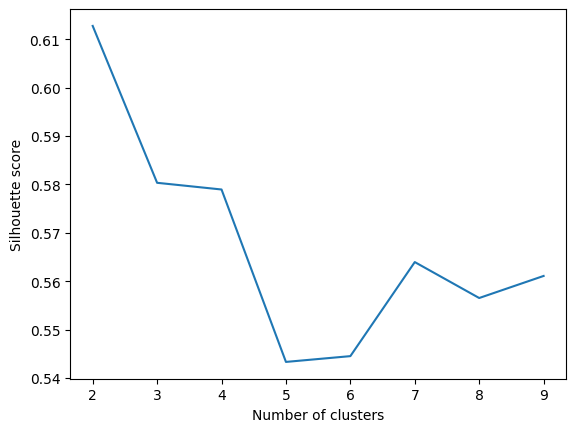

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Extract the x and y coordinates of the track
X = df[["x", "y", "Brake", "Throttle", "Gear", "SpeedMs", "DistanceRoundTrack"]]

# Initialize an empty list to store the silhouette scores
scores = []

# Fit a k-means model to the data for different values of n_clusters
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

# Plot the silhouette scores
plt.plot(range(2, 10), scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

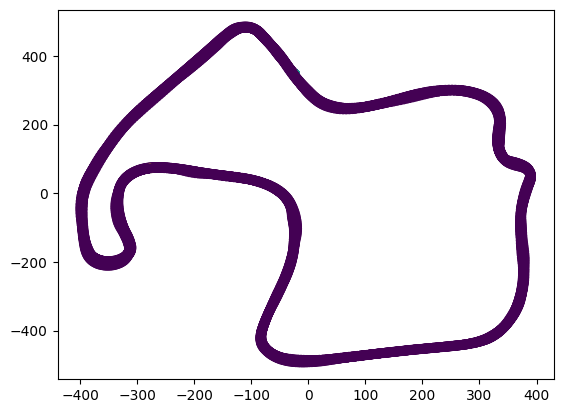

In [16]:
from sklearn.cluster import DBSCAN

# Extract the x and y coordinates of the track
X = df[["x", "y", "Brake", "Throttle", "Gear", "SpeedMs"]]

# Fit a DBSCAN model to the data
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

# Predict the cluster labels for each data point
labels = dbscan.labels_

# Plot the data points with different colors for each cluster
plt.scatter(df["x"], df["y"], c=labels, cmap="viridis")
plt.show()

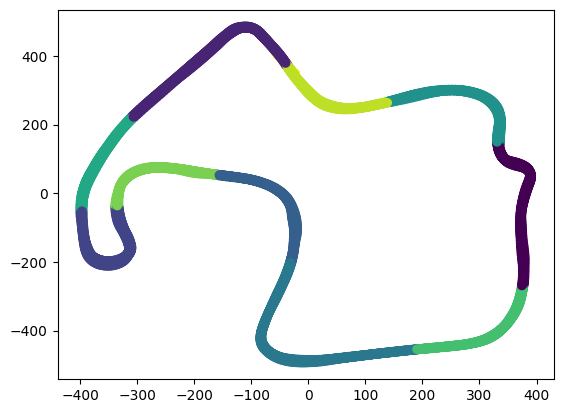

In [35]:
from sklearn.cluster import AgglomerativeClustering

# Extract the x and y coordinates of the track
X = df[["x", "y", "Brake", "Throttle", "Gear", "SpeedMs", "DistanceRoundTrack"]]

# Fit an agglomerative clustering model to the data
agg = AgglomerativeClustering(n_clusters=11)
labels = agg.fit_predict(X)

# Plot the data points with different colors for each cluster
plt.scatter(df["x"], df["y"], c=labels, cmap="viridis")
plt.show()

In [38]:
# now display with plotly
# Extract the distance and brake columns from the data frame
df_plot = df[["x", "y", "Brake", "Throttle", "Gear", "SpeedMs", "DistanceRoundTrack"]]

# Add the cluster labels as a new column in the data frame
df_plot["cluster"] = labels

# Create a scatter plot using plotly
fig = px.scatter(
    df_plot,
    x="DistanceRoundTrack",
    y="Brake",
    color="cluster",
    color_continuous_scale="viridis",
)
fig.show()

fig = px.scatter(
    df_plot,
    x="DistanceRoundTrack",
    y="Gear",
    color="cluster",
    color_continuous_scale="viridis",
)
fig.show()

fig = px.scatter(
    df_plot, x="x", y="y", color="cluster", color_continuous_scale="viridis"
)
fig.show()

/var/folders/_x/gpm51zpx5qx2qhtq3m8cj0cc0000gn/T/ipykernel_90565/790441327.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



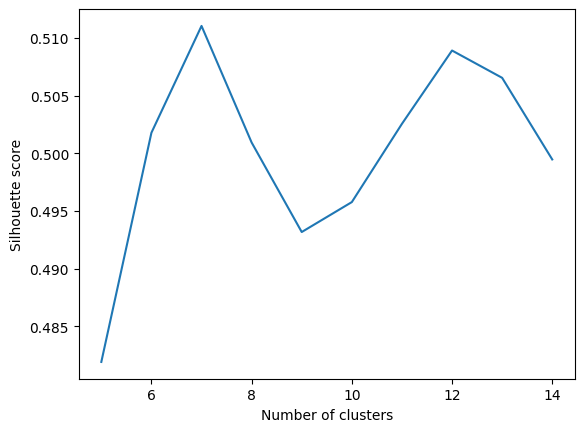

In [20]:
# This will fit an agglomerative clustering model to the data for different values of n_clusters (from 2 to 9), compute the silhouette score for each model, and plot the scores as a function of the number of clusters.

# The silhouette score is a measure of how well the data points in a cluster are separated from the data points in other clusters. It ranges from -1 to 1, with higher values indicating better separation. You can use the plot to identify the value of n_clusters that gives the highest silhouette score.

# I hope this helps! Let me know if you have any questions or if you'd like more information.

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Extract the x and y coordinates of the track
X = df[["x", "y"]].values

# Compute the silhouette score for different values of n_clusters
scores = []
for n_clusters in range(5, 15):
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)

# Plot the silhouette scores
plt.plot(range(5, 15), scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

In [21]:
scores

[0.4819150540345568,
 0.5017866276215186,
 0.5110491011027709,
 0.5009405142553822,
 0.4931786170393956,
 0.49577426984146566,
 0.5025587626602522,
 0.5089164437668108,
 0.5065486248637757,
 0.49947150070970137]

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Extract the x and y coordinates of the track
X = df[["x", "y"]].values

# Compute the within-cluster sum of squares for different values of n_clusters
sums_of_squares = []
for n_clusters in range(2, 10):
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    agg.fit(X)
    sums_of_squares.append(agg.inertia_)

# Plot the within-cluster sum of squares
plt.plot(range(2, 10), sums_of_squares)
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster sum of squares")
plt.show()

AttributeError: 'AgglomerativeClustering' object has no attribute 'inertia_'

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Extract the x and y coordinates of the track
X = df[["x", "y"]].values

# Compute the within-cluster sum of squares for different values of n_clusters
sums_of_squares = []
for n_clusters in range(2, 10):
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    agg.fit(X)
    distances = agg.linkage_[:, 2]
    sum_of_squares = sum(distances[-n_clusters:])
    sums_of_squares.append(sum_of_squares)

# Plot the within-cluster sum of squares
plt.plot(range(2, 10), sums_of_squares)
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster sum of squares")
plt.show()

AttributeError: 'AgglomerativeClustering' object has no attribute 'linkage_'

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances

# Extract the x and y coordinates of the track
X = df[["x", "y"]].values

# Compute the within-cluster sum of squares for different values of n_clusters
sums_of_squares = []
for n_clusters in range(2, 10):
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg.fit_predict(X)
    distances = euclidean_distances(X[:, None], X[:, None], squared=True)
    sum_of_squares = sum(
        distances[labels == i][:n_clusters].sum() for i in range(n_clusters)
    )
    sums_of_squares.append(sum_of_squares)

# Plot the within-cluster sum of squares
plt.plot(range(2, 10), sums_of_squares)
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster sum of squares")
plt.show()

ValueError: Found array with dim 3. check_pairwise_arrays expected <= 2.

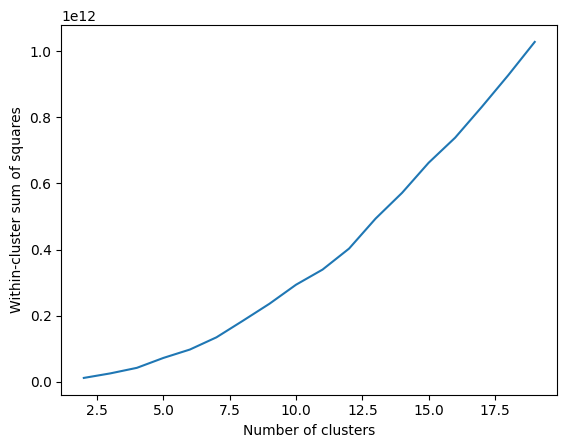

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances

# Extract the x and y coordinates of the track
X = df[["x", "y"]].values

# Compute the within-cluster sum of squares for different values of n_clusters
sums_of_squares = []
for n_clusters in range(2, 20):
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg.fit_predict(X)
    distances = euclidean_distances(X, squared=True)
    sum_of_squares = sum(
        distances[labels == i][:n_clusters].sum() for i in range(n_clusters)
    )
    sums_of_squares.append(sum_of_squares)

# Plot the within-cluster sum of squares
plt.plot(range(2, 20), sums_of_squares)
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster sum of squares")
plt.show()

## Preprocessing data

1. Some dataframes contains multiple laps. These multiple laps need to be split single laps.
2. In some laps vehicle goes out the track and driver goes revers. Driving reverse parts can be cleaned from data.

In [ ]:
f = go.FigureWidget()
display(f)

# Convert df data to numpy arrays
points_a = []
distances_a = []
for idx, df in enumerate(data):
    distances = df[["DistanceRoundTrack"]].to_numpy()[:, 0]
    points = df[["x", "y"]].to_numpy()
    distances, points = influx.make_monotonic(distances, points)

    points_a.append(points)
    distances_a.append(distances)

    f.add_scatter(y=distances, name=str(idx), mode="markers", marker=dict(size=2))

    # plt.plot(distances)
    # plt.xlabel('Index')
    # plt.ylabel('DistanceRoundTrack')
    # plt.show()

    # plt.figure()
    # x = points[:,0]
    # y = points[:,1]
    # plt.scatter(x, y, s=0.1)
    # plt.gca().set_aspect('equal', 'datalim')
    # plt.xlabel('WorldPosition_x')
    # plt.ylabel('WorldPosition_z')
    # plt.show()

FigureWidget({
    'data': [], 'layout': {'template': '...'}
})

## Creating track data
1. Track lenght is necessary for a better resampling. When car is slow, distance between the telementry messsage are very low.
2. All laps need to be resampled based on distance. This step is necessary for polynomial filter.
3. Outliers need to be filled with nan values. In laps, car slips and goes out the track. Around these extreme points data can be filled with nan.
4. Track points need to be created. A polynomial filter can be used to create track point.


### 1. Calculate track length

Track lenght is not available in the data. It can be calculated by using longest lap.

In [ ]:
track_length = influx.track_length(distances_a)
track_length

3601.10864

### 2. Resample laps

Telemetry data is recorded based on time. When vehicle is driving slow, gets more sample from same position. These position need to be resampled

In [ ]:
f = go.FigureWidget()
display(f)

for idx in range(len(distances_a)):
    distances_a[idx], points_a[idx] = influx.resample(
        distances_a[idx], points_a[idx], track_length
    )

    f.add_scatter(
        y=distances_a[idx], name=str(idx), mode="markers", marker=dict(size=2)
    )

    # plt.figure()
    # x = points_a[idx][:,0]
    # y = points_a[idx][:,1]
    # plt.scatter(x, y, s=0.1)
    # plt.gca().set_aspect('equal', 'datalim')
    # plt.xlabel('WorldPosition_x')
    # plt.ylabel('WorldPosition_z')
    # plt.show()

FigureWidget({
    'data': [], 'layout': {'template': '...'}
})

### 3. Fill with nan around outliers

Laps have some extream telemetry message. These outliers need to be filled with nan values. If yaw angle changes more than a threshold, this point is accepted as extreme

In [ ]:
f = go.FigureWidget()
display(f)

for idx in range(len(distances_a)):
    points_a[idx] = influx.remove_outliers(points_a[idx])

    f.add_scatter(
        x=points_a[idx][:, 0],
        y=points_a[idx][:, 1],
        name=str(idx),
        mode="markers",
        marker=dict(size=2),
    )

    # plt.figure()
    # x = points_a[idx][:,0]
    # y = points_a[idx][:,1]
    # plt.scatter(x, y, s=0.1)
    # plt.gca().set_aspect('equal', 'datalim')
    # plt.xlabel('WorldPosition_x')
    # plt.ylabel('WorldPosition_z')
    # plt.show()

FigureWidget({
    'data': [], 'layout': {'template': '...'}
})

### 4. Calculate track points

There are records from multiple laps. These lap points need to be merge to a track points. A polynomial is fit around each points with multiple laps.

In [ ]:
f = go.FigureWidget()
# display(f)

distances, points = influx.merge_track_points(distances_a, points_a, track_length)

f.add_scatter(
    x=points[:, 0], y=points[:, 1], name="merged", mode="markers", marker=dict(size=2)
)

# plt.figure()
# x = points[:,0]
# y = points[:,1]
# plt.scatter(x, y, s=0.1)
# plt.gca().set_aspect('equal', 'datalim')
# plt.xlabel('WorldPosition_x')
# plt.ylabel('WorldPosition_z')
# plt.show()

FigureWidget({
    'data': [{'marker': {'size': 2},
              'mode': 'markers',
              'name': 'me…

## Finding track corners
1. Yaw changes need to be calculated to detect corners. Yaw changes can be calculated by track points
2. Track sections need to be created. Track sections can be found by using yaw changes.
3. Visualize result.

### 1. Calculate yaw change

Yaw changes are need to find corners. From points yaw changes can be calculated by derivative.

### 2. Get track sections

Track sections need to be found. When yaw changes higher than the threshold, this point accepted as part of corner.

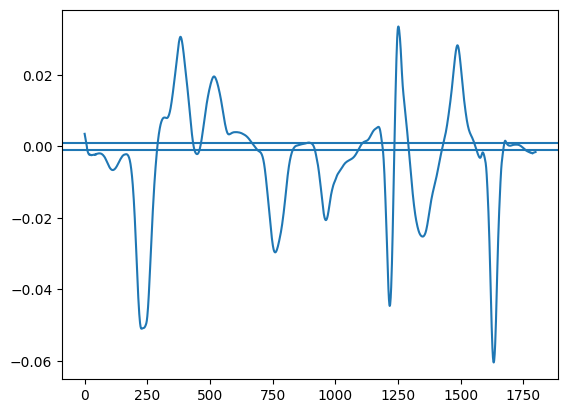

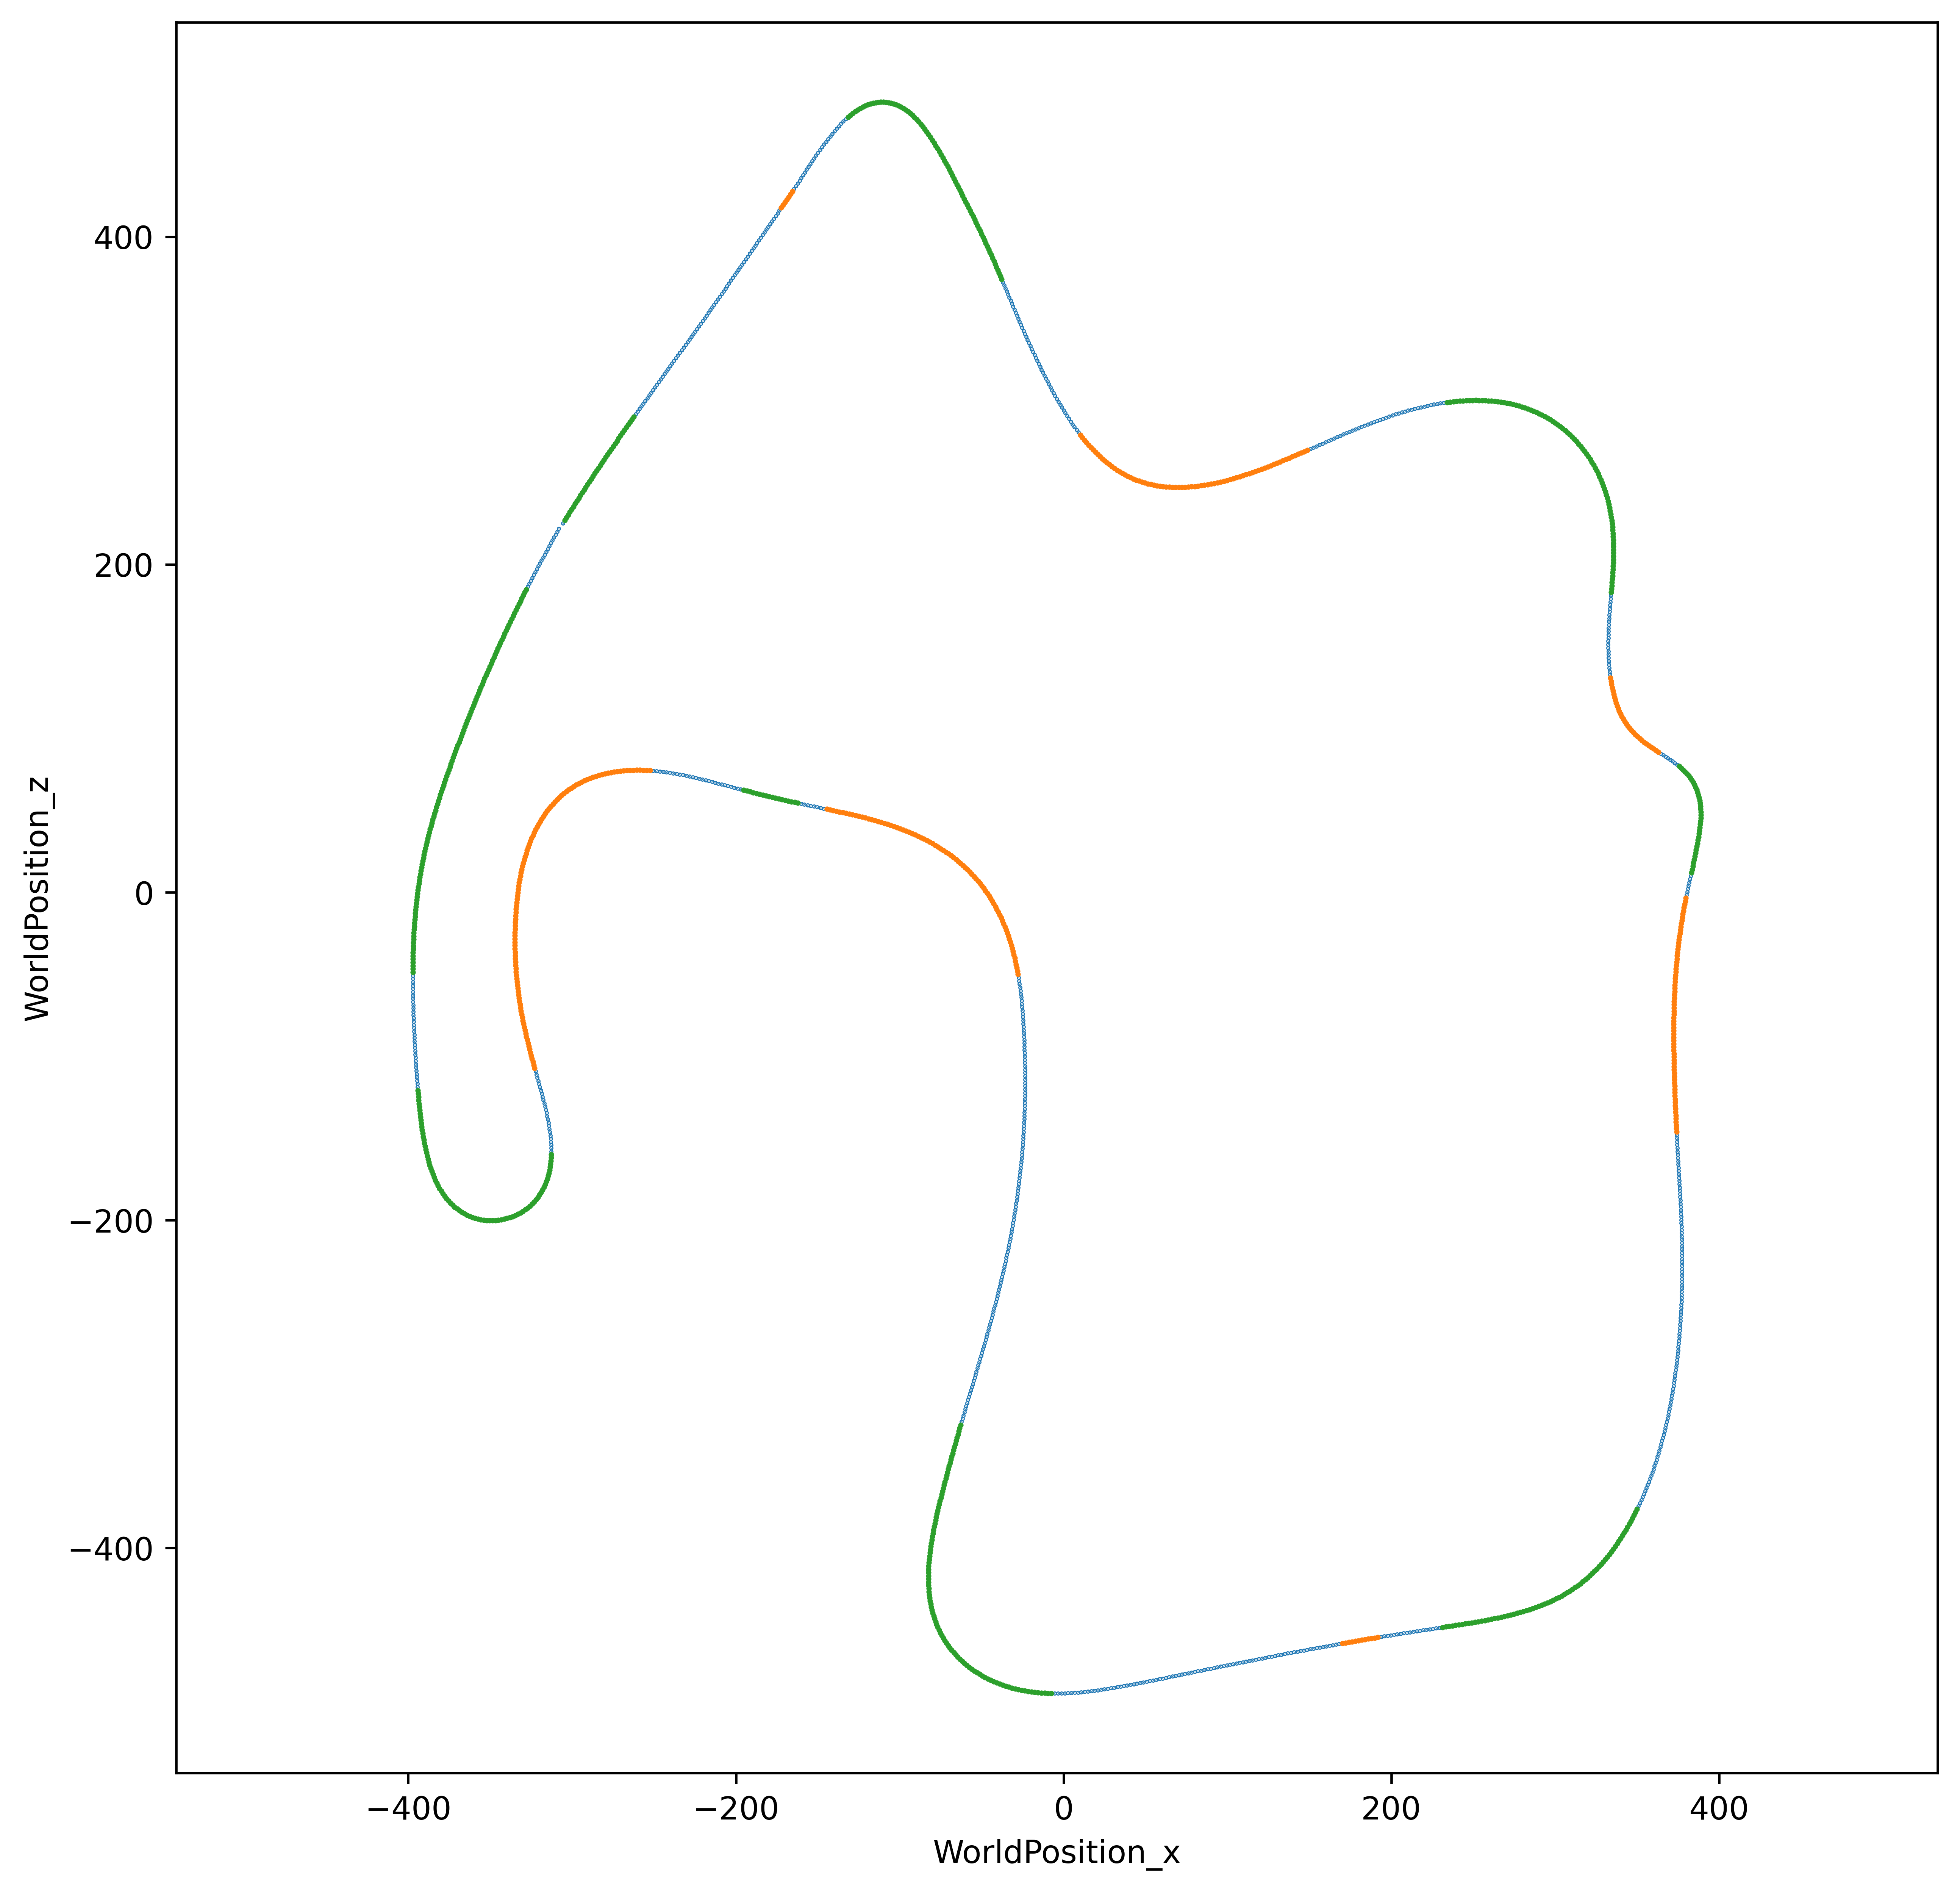

In [ ]:
threshold = 0.001
yaw_changes = influx.yaw_changes(points)

plt.figure()
plt.plot(yaw_changes)
plt.axhline(y=-threshold, xmin=0, xmax=1)
plt.axhline(y=threshold, xmin=0, xmax=1)
plt.show()

sections = influx.track_sections(distances, yaw_changes, threshold=threshold)

straight = []
cw = []
ccw = []
# Iterate over points
for point_idx in range(distances.shape[0]):
    dist = distances[point_idx]
    # Iterate over sections
    for sec in sections:
        # Check if point is inside the sections.
        if sec["start"] < dist < sec["end"]:
            if sec["type"] == "straight":
                straight.append(points[point_idx])
            if sec["type"] == "clock_wise":
                cw.append(points[point_idx])
            if sec["type"] == "counter_clock_wise":
                ccw.append(points[point_idx])
straight = np.array(straight)
cw = np.array(cw)
ccw = np.array(ccw)

plt.figure(figsize=(10, 10), dpi=600)
plt.scatter(points[:, 0], points[:, 1], s=0.1)
if len(cw):
    plt.scatter(cw[:, 0], cw[:, 1], s=0.5)
if len(ccw):
    plt.scatter(ccw[:, 0], ccw[:, 1], s=0.5)
plt.gca().set_aspect("equal", "datalim")
plt.xlabel("WorldPosition_x")
plt.ylabel("WorldPosition_z")
plt.show()

In [ ]:
pd.DataFrame(sections)

type   start     end  max_yaw_change
0   counter_clock_wise    40.0   290.0        0.006599
1             straight   290.0   358.0        0.000000
2   counter_clock_wise   358.0   534.0        0.051029
3             straight   534.0   584.0        0.001235
4           clock_wise   584.0   824.0        0.030701
5             straight   824.0   878.0        0.014356
6   counter_clock_wise   878.0   916.0        0.002135
7             straight   916.0   930.0        0.001269
8           clock_wise   930.0  1104.0        0.019607
9             straight  1104.0  1380.0        0.009264
10  counter_clock_wise  1380.0  1600.0        0.029645
11            straight  1600.0  1776.0        0.001011
12          clock_wise  1776.0  1802.0        0.001079
13            straight  1802.0  1838.0        0.000964
14  counter_clock_wise  1838.0  1990.0        0.020612
15            straight  1990.0  2220.0        0.001052
16          clock_wise  2220.0  2368.0        0.005494
17            straight  2368.0  2380.0        0.001664
18  counter_clock_wise  2380.0  2460.0        0.044642
19            straight  2460.0  2474.0        0.004068
20          clock_wise  2474.0  2540.0        0.033600
21            straight  2540.0  2588.0        0.015292
22  counter_clock_wise  2588.0  2780.0        0.025223
23            straight  2780.0  2866.0        0.001282
24          clock_wise  2866.0  3026.0        0.028322
25            straight  3026.0  3128.0        0.012983
26  counter_clock_wise  3128.0  3298.0        0.060481
27            straight  3298.0  3350.0        0.001137
28          clock_wise  3350.0  3366.0        0.001604
29            straight  3366.0  3518.0        0.000834
30  counter_clock_wise  3518.0  3598.0        0.001953